<a href="https://colab.research.google.com/github/kushwahapriya878/Code-Creations/blob/main/Starbucks_Customer_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()

Saving starbucks logo.png to starbucks logo.png


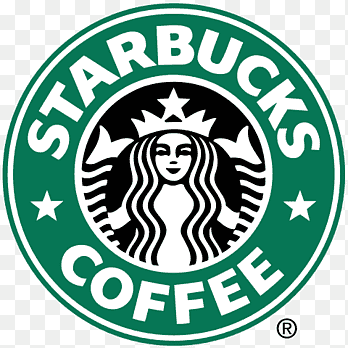

In [50]:
Image('starbucks logo.png', width=400)

# **About Starbucks**
Starbucks Corporation is an American multinational chain of coffeehouses and roastery reserves headquartered in Seattle, Washington. It was founded in 1971, and is currently the world's largest coffeehouse chain

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
profile_df= pd.read_csv('/content/profile.csv')

In [2]:
# loding data set
profile_df= pd.read_csv('/content/profile.csv')
portfolio_df= pd.read_csv('/content/portfolio.csv')
transcript_df= pd.read_csv('/content/transcript.csv')

**Dropping Unknown columns from dataframe**

In [3]:
profile_df.drop('Unnamed: 0', axis=1, inplace =True)

In [4]:
portfolio_df.drop('Unnamed: 0', axis=1, inplace =True)

In [5]:
transcript_df.drop('Unnamed: 0', axis=1, inplace =True)

In [ ]:
profile_df.head()

,Unnamed: 0,gender,age,id,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [ ]:
portfolio_df.head()

,Unnamed: 0,reward,channels,difficulty,duration,offer_type,id
0,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [ ]:
transcript_df.head()

,Unnamed: 0,person,event,value,time
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


**Data Filtering**

In [ ]:
profile_df.isna().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

Gender and income contains null value

In [ ]:
age_df=profile_df['age'].value_counts()
age_df

age
118    2175
58      408
53      372
51      363
54      359
       ... 
100      12
96        8
98        5
101       5
99        5
Name: count, Length: 85, dtype: int64

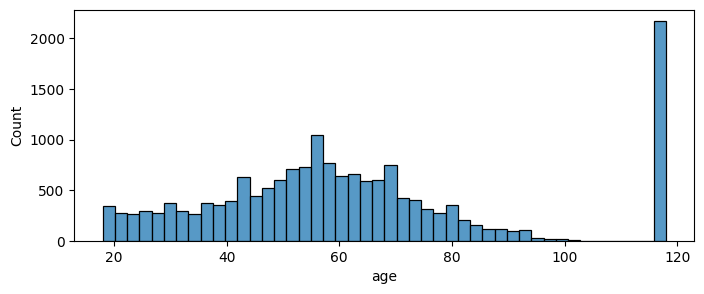

In [ ]:
plt.figure(figsize=(8,3))
sns.histplot(data=profile_df, x='age')
plt.show()

In [ ]:
profile_df['age'].describe()

count    17000.000000
mean        62.531412
std         26.738580
min         18.000000
25%         45.000000
50%         58.000000
75%         73.000000
max        118.000000
Name: age, dtype: float64

As per above analysis max age 118 is suspicious
and also we found the some missing gender in gender and column and income so we can remove it.

In [ ]:
profile_df.dropna(inplace=True)

In [ ]:
profile_df

,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


# Univariate Analysis

**Checking Gender distribution**

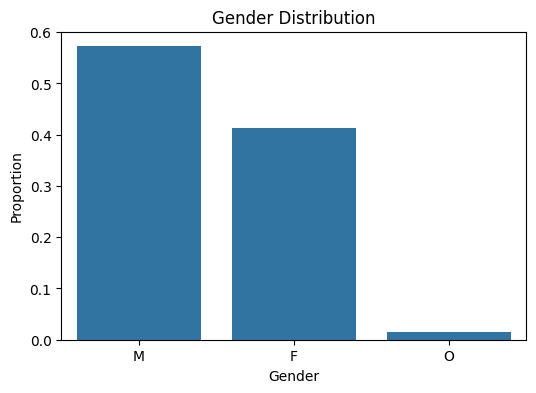

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x=profile_df['gender'].value_counts().index, y=profile_df['gender'].value_counts(normalize=True))
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.show()

Insight:
The Gender is like above 57% customers are male, 43% customers are female and others are 3%.

**Checking Age distribution**

In [ ]:
profile_df['log_income']= profile_df['income'].apply(np.log10)

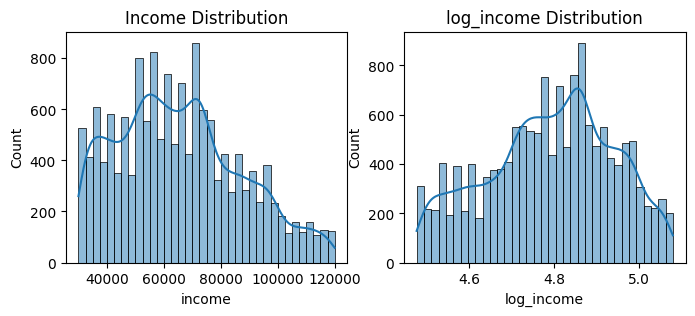

In [ ]:
fig, axes= plt.subplots(1,2, figsize=(8,3))
for i, j in enumerate(['income', 'log_income']):
  sns.histplot(ax=axes[i], data=profile_df, x=j, kde=True)
axes[0].set_title('Income Distribution')
axes[1].set_title('log_income Distribution')
plt.show()

In [ ]:
print('Average income is {}'.format(round(profile_df['income'].mean(),2)))
print('Median income is {}'.format(round(profile_df['income'].median(),2)))

Average income is 65404.99
Median income is 64000.0


# Checking number of member by became_member_on

In [6]:
# converting became_member_on in proper datetime
profile_df['became_member_on']= pd.to_datetime(profile_df['became_member_on'], format='%Y%m%d')
# creating new column
profile_df['year']=profile_df['became_member_on'].dt.year
profile_df['month']=profile_df['became_member_on'].dt.month

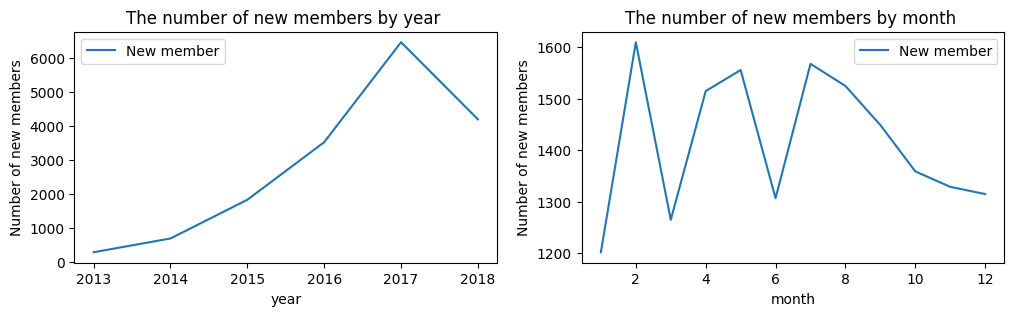

In [8]:
fig, axes = plt.subplots(1,2, figsize=(12,3))
for i , j in enumerate(['year', 'month']):
  sns.lineplot(ax=axes[i], x=profile_df[j].unique(), y=profile_df[j].value_counts(), label='New member')
  axes[i].set_title(f"The number of new members by {j} ")
  axes[i].set_xlabel(f'{j}')
  axes[i].set_ylabel(f'Number of new members')
plt.show()

**Avg purchase distribustion**

In [9]:
profile_df['id']= profile_df['id'].str.strip()
transcript_df['person']= transcript_df['person'].str.strip()

In [10]:
# Merging data frame
profile_transcript = profile_df.merge(right=transcript_df, how='left', left_on='id', right_on='person')
profile_transcript.head()

,gender,age,id,became_member_on,income,year,month,person,event,value,time
0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN,2017,2,NaN,NaN,NaN,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,{'amount': 21.51},18.0
2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN,2018,7,NaN,NaN,NaN,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,2017,5,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0.0
4,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,2017,5,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},6.0


In [11]:
transaction = profile_transcript.loc[profile_transcript['event'] == 'transaction']
offer = profile_transcript.loc[profile_transcript['event'] != 'transaction']

In [12]:
import re

pattern = re.compile('[\d]+.[\d]+')
transaction['value'] = transaction['value'].apply(pattern.findall).str.get(0)
transaction.rename(columns={'value': 'amount'}, inplace=True)
transaction = transaction.astype(dtype={'amount': 'float'})
transaction.head()

<ipython-input-12-851996b0173f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction['value'] = transaction['value'].apply(pattern.findall).str.get(0)
<ipython-input-12-851996b0173f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction.rename(columns={'value': 'amount'}, inplace=True)


,gender,age,id,became_member_on,income,year,month,person,event,amount,time
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,21.51,18.0
30,F,78,c27e0d6ab72c455a8bb66d980963de60,2017-06-16,71000.0,2017,6,c27e0d6ab72c455a8bb66d980963de60,transaction,13.25,18.0
45,M,40,f082d80f0aac47a99173ba8ef8fc1909,2016-07-09,33000.0,2016,7,f082d80f0aac47a99173ba8ef8fc1909,transaction,5.47,12.0
49,F,69,102e9454054946fda62242d2e176fdce,2016-08-14,57000.0,2016,8,102e9454054946fda62242d2e176fdce,transaction,19.88,6.0
51,F,69,102e9454054946fda62242d2e176fdce,2016-08-14,57000.0,2016,8,102e9454054946fda62242d2e176fdce,transaction,14.35,12.0


In [13]:
#creating pivot table that contains mean purchase amount by each member

trans_pivot= transaction.pivot_table(index='id', values='amount', aggfunc='mean').reset_index()
trans_pivot

,id,amount
0,004b041fbfe44859945daa2c7f79ee64,25.62
1,00715b6e55c3431cb56ff7307eb19675,27.26
2,0091d2b6a5ea4defaa8393e4e816db60,16.58
3,00ed7e22b32749cfafbfd88592d401d4,25.03
4,00fac72fd6ad448e8019b175267023df,26.69
...,...,...
2286,ff7fdf82996949ec82d158a02a1d9cca,12.09
2287,ff95e0a9cdfd4030958762dadcb11e1a,23.96
2288,ffb62bee02c14583b9763f8613bcace7,3.68
2289,fff3ba4757bd42088c044ca26d73817a,20.98


In [17]:
# To get the demographic detail of each member merging trans_pivot table with profile table
profile_trans_pivot= trans_pivot.merge(right=profile_df, how='left', on='id')
profile_trans_pivot.head()

,id,amount,gender,age,became_member_on,income,year,month
0,004b041fbfe44859945daa2c7f79ee64,25.62,F,55,2018-05-08,74000.0,2018,5
1,00715b6e55c3431cb56ff7307eb19675,27.26,F,58,2017-12-07,119000.0,2017,12
2,0091d2b6a5ea4defaa8393e4e816db60,16.58,F,62,2016-06-17,81000.0,2016,6
3,00ed7e22b32749cfafbfd88592d401d4,25.03,M,55,2016-07-31,94000.0,2016,7
4,00fac72fd6ad448e8019b175267023df,26.69,M,57,2017-04-15,80000.0,2017,4


In [23]:
# creating Generation column for better analysis

def generation(age):
  if age<20:
    return "Teenager"
  elif age <40:
    return "Youth"
  elif age< 60:
    return "Middle"
  elif age<70:
    return "Older"
  else:
    return "Seinor"

profile_trans_pivot['generation']= profile_trans_pivot['age'].apply(generation)
profile_trans_pivot.head()

,id,amount,gender,age,became_member_on,income,year,month,generation
0,004b041fbfe44859945daa2c7f79ee64,25.62,F,55,2018-05-08,74000.0,2018,5,Middle
1,00715b6e55c3431cb56ff7307eb19675,27.26,F,58,2017-12-07,119000.0,2017,12,Middle
2,0091d2b6a5ea4defaa8393e4e816db60,16.58,F,62,2016-06-17,81000.0,2016,6,Older
3,00ed7e22b32749cfafbfd88592d401d4,25.03,M,55,2016-07-31,94000.0,2016,7,Middle
4,00fac72fd6ad448e8019b175267023df,26.69,M,57,2017-04-15,80000.0,2017,4,Middle


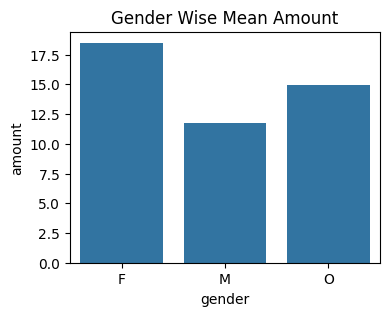

In [20]:
gender_wise_MeanAmount=profile_trans_pivot.groupby(by='gender')['amount'].mean()

plt.figure(figsize=(4,3))
sns.barplot(x=gender_wise_MeanAmount.index, y=gender_wise_MeanAmount)
plt.title("Gender Wise Mean Amount")
plt.show()


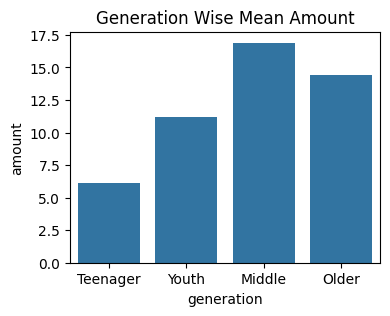

In [24]:
gender_wise_MeanAmount=profile_trans_pivot.groupby(by='generation')['amount'].mean()

plt.figure(figsize=(4,3))
sns.barplot(x=gender_wise_MeanAmount.index, y=gender_wise_MeanAmount, order=['Teenager', 'Youth', 'Middle', 'Older'])
plt.title("Generation Wise Mean Amount")
plt.show()

In [25]:
offer = profile_transcript.loc[profile_transcript['event'] == 'offer completed']

ID_LENGTH = 32

offer['offer_id'] = offer['value'].str.slice(start=14, stop=(14 + ID_LENGTH))
offer = offer.drop(labels='value', axis=1)
offer.head()

<ipython-input-25-669d00629dab>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offer['offer_id'] = offer['value'].str.slice(start=14, stop=(14 + ID_LENGTH))


,gender,age,id,became_member_on,income,year,month,person,event,time,offer_id
46,M,40,f082d80f0aac47a99173ba8ef8fc1909,2016-07-09,33000.0,2016,7,f082d80f0aac47a99173ba8ef8fc1909,offer completed,12.0,9b98b8c7a33c4b65b9aebfe6a799e6d9
50,F,69,102e9454054946fda62242d2e176fdce,2016-08-14,57000.0,2016,8,102e9454054946fda62242d2e176fdce,offer completed,6.0,4d5c57ea9a6940dd891ad53e9dbe8da0
82,M,42,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,2016-01-17,96000.0,2016,1,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,0.0,2906b810c7d4411798c6938adc9daaa5
113,F,58,99e9a1916821461ebd5d5048dc2dff7d,2018-01-25,85000.0,2018,1,99e9a1916821461ebd5d5048dc2dff7d,offer completed,18.0,f19421c1d4aa40978ebb69ca19b0e20d
172,M,53,13033baa9d294c3c9165a00d71b72614,2017-09-27,96000.0,2017,9,13033baa9d294c3c9165a00d71b72614,offer completed,18.0,2906b810c7d4411798c6938adc9daaa5


In [26]:
cleaned_transcript = pd.concat(objs=[transaction, offer]).sort_index()
cleaned_transcript.head()

,gender,age,id,became_member_on,income,year,month,person,event,amount,time,offer_id
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,21.51,18.0,NaN
30,F,78,c27e0d6ab72c455a8bb66d980963de60,2017-06-16,71000.0,2017,6,c27e0d6ab72c455a8bb66d980963de60,transaction,13.25,18.0,NaN
45,M,40,f082d80f0aac47a99173ba8ef8fc1909,2016-07-09,33000.0,2016,7,f082d80f0aac47a99173ba8ef8fc1909,transaction,5.47,12.0,NaN
46,M,40,f082d80f0aac47a99173ba8ef8fc1909,2016-07-09,33000.0,2016,7,f082d80f0aac47a99173ba8ef8fc1909,offer completed,NaN,12.0,9b98b8c7a33c4b65b9aebfe6a799e6d9
49,F,69,102e9454054946fda62242d2e176fdce,2016-08-14,57000.0,2016,8,102e9454054946fda62242d2e176fdce,transaction,19.88,6.0,NaN


In [28]:
cleaned_transcript['generation'] = cleaned_transcript['age'].apply(generation)

In [33]:
history = cleaned_transcript.merge(right=portfolio_df, how='left', left_on='offer_id', right_on='id')
history

,gender,age,id_x,became_member_on,income,year,month,person,event,amount,time,offer_id,generation,reward,channels,difficulty,duration,offer_type,id_y
0,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,21.51,18.0,NaN,Middle,NaN,NaN,NaN,NaN,NaN,NaN
1,F,78,c27e0d6ab72c455a8bb66d980963de60,2017-06-16,71000.0,2017,6,c27e0d6ab72c455a8bb66d980963de60,transaction,13.25,18.0,NaN,Seinor,NaN,NaN,NaN,NaN,NaN,NaN
2,M,40,f082d80f0aac47a99173ba8ef8fc1909,2016-07-09,33000.0,2016,7,f082d80f0aac47a99173ba8ef8fc1909,transaction,5.47,12.0,NaN,Middle,NaN,NaN,NaN,NaN,NaN,NaN
3,M,40,f082d80f0aac47a99173ba8ef8fc1909,2016-07-09,33000.0,2016,7,f082d80f0aac47a99173ba8ef8fc1909,offer completed,NaN,12.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,Middle,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,F,69,102e9454054946fda62242d2e176fdce,2016-08-14,57000.0,2016,8,102e9454054946fda62242d2e176fdce,transaction,19.88,6.0,NaN,Older,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,F,52,6e71b66784844d1ab8376ac8ab096d4b,2018-05-22,75000.0,2018,5,6e71b66784844d1ab8376ac8ab096d4b,transaction,16.57,6.0,NaN,Middle,NaN,NaN,NaN,NaN,NaN,NaN
3338,F,52,6e71b66784844d1ab8376ac8ab096d4b,2018-05-22,75000.0,2018,5,6e71b66784844d1ab8376ac8ab096d4b,offer completed,NaN,6.0,4d5c57ea9a6940dd891ad53e9dbe8da0,Middle,10.0,"['web', 'email', 'mobile', 'social']",10.0,5.0,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
3339,F,44,e2fd53ed790240c586b3188f23542cca,2017-01-19,51000.0,2017,1,e2fd53ed790240c586b3188f23542cca,transaction,8.80,0.0,NaN,Middle,NaN,NaN,NaN,NaN,NaN,NaN
3340,F,21,400d0536e8794cbb855b0d882d67cbda,2017-09-17,72000.0,2017,9,400d0536e8794cbb855b0d882d67cbda,transaction,4.31,0.0,NaN,Youth,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
history = history.drop(labels=['id_y'], axis=1)
history.rename(columns={'id_x': 'id'}, inplace=True)
history.head()

,gender,age,id,became_member_on,income,year,month,person,event,amount,time,offer_id,generation,reward,channels,difficulty,duration,offer_type
0,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,21.51,18.0,NaN,Middle,NaN,NaN,NaN,NaN,NaN
1,F,78,c27e0d6ab72c455a8bb66d980963de60,2017-06-16,71000.0,2017,6,c27e0d6ab72c455a8bb66d980963de60,transaction,13.25,18.0,NaN,Seinor,NaN,NaN,NaN,NaN,NaN
2,M,40,f082d80f0aac47a99173ba8ef8fc1909,2016-07-09,33000.0,2016,7,f082d80f0aac47a99173ba8ef8fc1909,transaction,5.47,12.0,NaN,Middle,NaN,NaN,NaN,NaN,NaN
3,M,40,f082d80f0aac47a99173ba8ef8fc1909,2016-07-09,33000.0,2016,7,f082d80f0aac47a99173ba8ef8fc1909,offer completed,NaN,12.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,Middle,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo
4,F,69,102e9454054946fda62242d2e176fdce,2016-08-14,57000.0,2016,8,102e9454054946fda62242d2e176fdce,transaction,19.88,6.0,NaN,Older,NaN,NaN,NaN,NaN,NaN


In [34]:
history = history.drop(labels=['id_y'], axis=1)
history.rename(columns={'id_x': 'id'}, inplace=True)
history.head()

,gender,age,id,became_member_on,income,year,month,person,event,amount,time,offer_id,generation,reward,channels,difficulty,duration,offer_type
0,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,21.51,18.0,NaN,Middle,NaN,NaN,NaN,NaN,NaN
1,F,78,c27e0d6ab72c455a8bb66d980963de60,2017-06-16,71000.0,2017,6,c27e0d6ab72c455a8bb66d980963de60,transaction,13.25,18.0,NaN,Seinor,NaN,NaN,NaN,NaN,NaN
2,M,40,f082d80f0aac47a99173ba8ef8fc1909,2016-07-09,33000.0,2016,7,f082d80f0aac47a99173ba8ef8fc1909,transaction,5.47,12.0,NaN,Middle,NaN,NaN,NaN,NaN,NaN
3,M,40,f082d80f0aac47a99173ba8ef8fc1909,2016-07-09,33000.0,2016,7,f082d80f0aac47a99173ba8ef8fc1909,offer completed,NaN,12.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,Middle,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo
4,F,69,102e9454054946fda62242d2e176fdce,2016-08-14,57000.0,2016,8,102e9454054946fda62242d2e176fdce,transaction,19.88,6.0,NaN,Older,NaN,NaN,NaN,NaN,NaN


In [35]:
history['amount'] = history['amount'].fillna(method='ffill')
history = history.drop_duplicates(subset=['id', 'time'], keep='last')
history.head()

,gender,age,id,became_member_on,income,year,month,person,event,amount,time,offer_id,generation,reward,channels,difficulty,duration,offer_type
0,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,21.51,18.0,NaN,Middle,NaN,NaN,NaN,NaN,NaN
1,F,78,c27e0d6ab72c455a8bb66d980963de60,2017-06-16,71000.0,2017,6,c27e0d6ab72c455a8bb66d980963de60,transaction,13.25,18.0,NaN,Seinor,NaN,NaN,NaN,NaN,NaN
3,M,40,f082d80f0aac47a99173ba8ef8fc1909,2016-07-09,33000.0,2016,7,f082d80f0aac47a99173ba8ef8fc1909,offer completed,5.47,12.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,Middle,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo
5,F,69,102e9454054946fda62242d2e176fdce,2016-08-14,57000.0,2016,8,102e9454054946fda62242d2e176fdce,offer completed,19.88,6.0,4d5c57ea9a6940dd891ad53e9dbe8da0,Older,10.0,"['web', 'email', 'mobile', 'social']",10.0,5.0,bogo
6,F,69,102e9454054946fda62242d2e176fdce,2016-08-14,57000.0,2016,8,102e9454054946fda62242d2e176fdce,transaction,14.35,12.0,NaN,Older,NaN,NaN,NaN,NaN,NaN


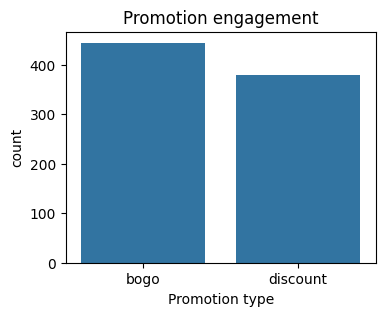

In [53]:
offer_completed = history.loc[history['event'] == 'offer completed']
plt.figure(figsize=(4, 3))
sns.countplot(data=offer_completed, x='offer_type')
plt.title('Promotion engagement')
plt.xlabel('Promotion type')
plt.show()

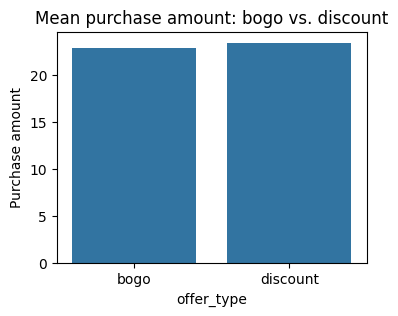

In [54]:
gby_offer_type = offer_completed.groupby(by='offer_type')['amount'].mean()
plt.figure(figsize=(4, 3))
sns.barplot(x=gby_offer_type.index, y=gby_offer_type)
plt.title('Mean purchase amount: bogo vs. discount')
plt.ylabel('Purchase amount')
plt.show()

In [ ]:
profile_df.head()

,gender,age,id,became_member_on,income,year,month
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,7
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,2017,5
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,2018,4
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,2018,2
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,2017,11


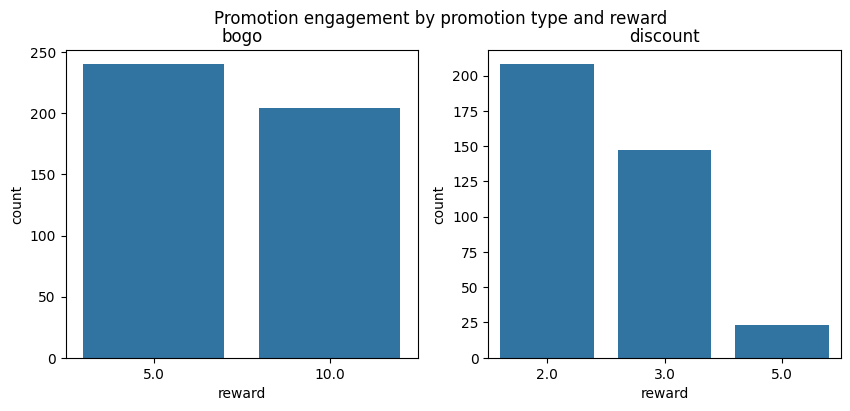

In [42]:
bogo = offer_completed.loc[offer_completed['offer_type'] == 'bogo']
discount = offer_completed.loc[offer_completed['offer_type'] == 'discount']

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.countplot(ax=axes[0], data=bogo, x='reward')
sns.countplot(ax=axes[1], data=discount, x='reward')
plt.suptitle('Promotion engagement by promotion type and reward')
axes[0].set_title('bogo')
axes[1].set_title('discount')
plt.show()

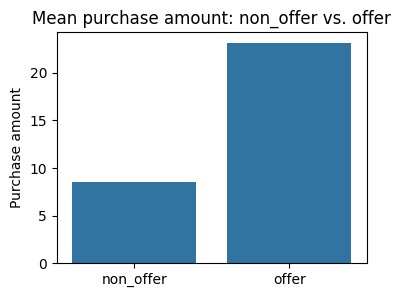

In [55]:
history_non_offer = history.loc[history['event'] == 'transaction']
history_offer = history.loc[history['event'] == 'offer completed']
plt.figure(figsize=(4, 3))
sns.barplot(x=['non_offer', 'offer'], y=[history_non_offer['amount'].mean(), history_offer['amount'].mean()])
plt.title('Mean purchase amount: non_offer vs. offer')
plt.ylabel('Purchase amount')
plt.show()

In [ ]:
transcript_df

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0.0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0.0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0.0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0.0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0.0
...,...,...,...,...
10088,5495db54251e492d989822a1444ac7d7,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},0.0
10089,ef8f67145482420ea6de8f210413ccc3,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0.0
10090,366fe99ee1c14def823cae2c5df14fb8,offer received,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},0.0
10091,7d1dd620977d4d61a5a8c172b3b68147,offer received,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},0.0
